<a href="https://colab.research.google.com/github/apustay/apustay.github.io/blob/main/Capstone_Project_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Banks derive a significant amount of their profit from home loans, but this profit can be eaten quickly by a home loan that defaults.  It is therefore in their best intrest to identify good paying customer from those that may default on a loan during the approval process.

The approval process includes assessing an applicant's likelihood of repaying the loan.  This is typically done by looking at the applicants past behavior with credit that they have been extended.  this ia cumbersome process and requires trained personnel to assess each applicant which makes it prone to errors.

### **The objective:**

Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.

### **The key questions:**

What features indicate that a customer is likely to default?


### **The problem formulation**:

Based on data obtained from the existing loan underwriting process derive a predictive model to identify risky customers and provide the necessary justification for this assessment.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
#importing basic datasci libraries
import pandas as pd
import numpy as np

#importing chart display libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing stats and scaler for scoring and
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

#importing machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, classification_report, recall_score, f1_score

#importing boosting libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
#prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
#downloading the data for analysis
data = pd.read_csv('/content/drive/MyDrive/AppliedDataScience/Projects/Capstone/hmeq.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Some missing values.  Most columns include numeric values with a few objects.  Based on the dependent variable "BAD" we can see the maximum number of rows is 5960.

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [ ]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

Observations:
- "BAD" (the dependent variable) has is binary (1 or 0)
- Many NaN values are present in the data.




In [ ]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Given the above NaN values I will treat these after I treat outliers in the chance that they are weeded out before hand.

## Summary Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


- Observations from Summary Statistics

- Loan Value varies from 1,000 to 90,000
- Mortgage Still due on the home is between 2,000 and 400,000
- Home values vary from 8,000 to 860,000 with a mean value of 100,000
- The average credit age of an applicant is around 180 mo (15yrs)
- The average number of credit lines is 21
- The average debt to income ratio (calcuated monthly) is around 34%
- The average loan being applied for is significantly less than the average mortgage value the applicants already have.  
- The average value of the home is higher than the average mortgage meaning on average customers should have equity in their home.
- There is a significant number of null values for Debt to Income Ratio, Deroggetory Marks, Mortgage Due, Number of Recent Inquiries, Delinquent Marks, and Years on the Job.
- Debt to income ratio are significantly higher than 1.  This means that some applicants have monthly income that is less than their current monthly bills.



In [ ]:
NumericColumns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC','BAD']
CatagoryColumns = ['REASON','JOB']

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
  - Between 1,000 and 90,000

2. How does the distribution of years at present job "YOJ" vary across the dataset?
  - It is right skewed (outliers are in higher year values).  The median years worked at job is 1.  Could be first time home buyers or people who have recently changed jobs.

3. How many unique categories are there in the REASON variable?
 - (2) unique categories. Home Improvement and Debt Consolidation.

4. What is the most common category in the JOB variable?
 - The most common category is "OTHER". So not an executive, office worker, manager, self-employed, or salesman.

5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
 - Debt Consolidation is the most likely reason to apply for a loan and has a higher actual value of defaults, but proportionally those applying for a Home Improvement loan are more likley to default.

6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
  - There is a slight trend towards loans been in good standing at the higher range.  The mean values between defaulted and in good standing is about 3,000 which is not very much.  Above 80,000 it appears that the data show almost all in good standing.

7. Is there a correlation between the value of the property and the loan default rate?
  - no there is a slightly negative correlation, but there appear to be several outliers at the top of the value range that show as defaulted.

8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?
  - Loan defaults cover almost the full range of vales for both defaults and in good standing.  There is a higher frequency of loan defaults when the mortgage value is very high.

### **Univariate Analysis**


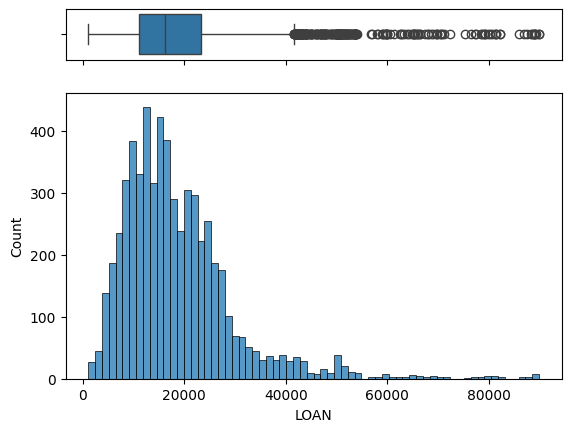

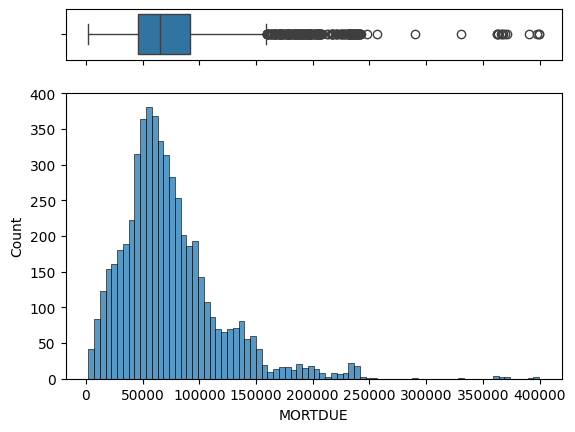

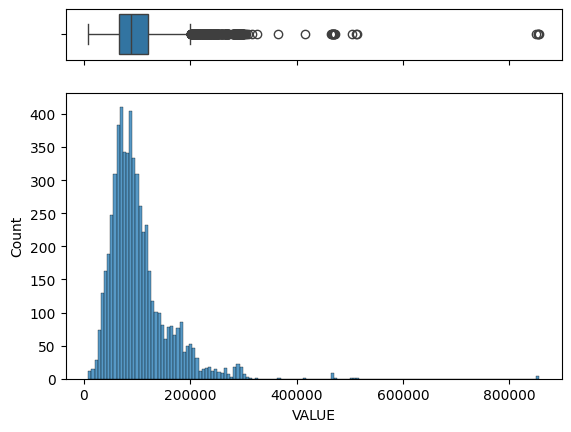

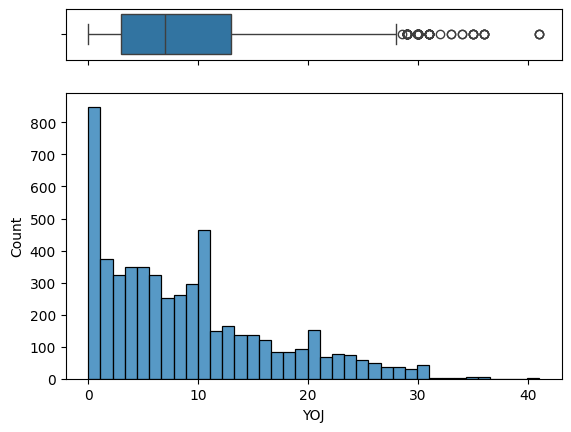

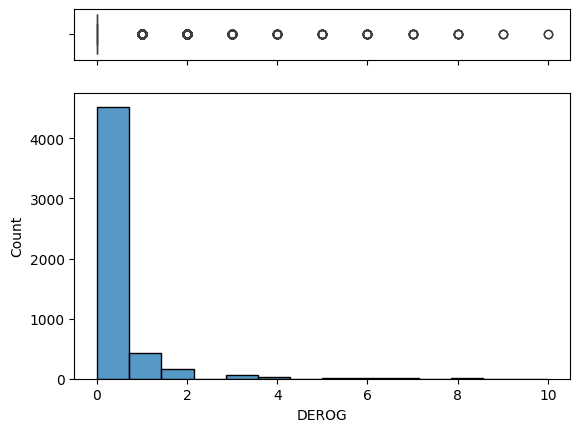

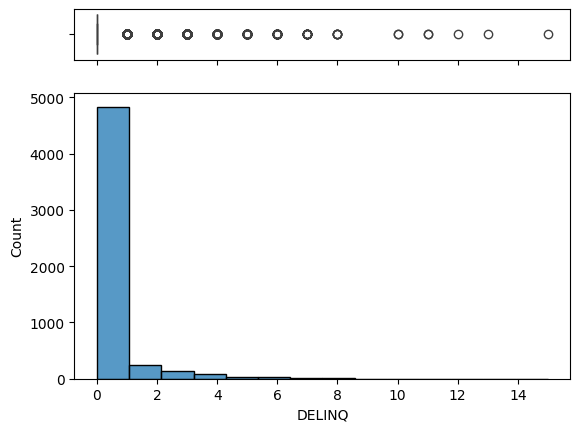

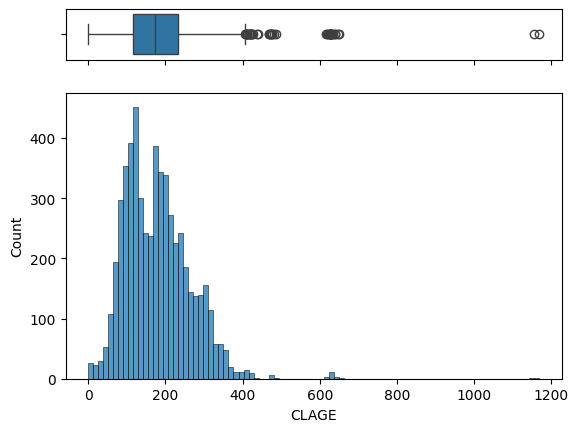

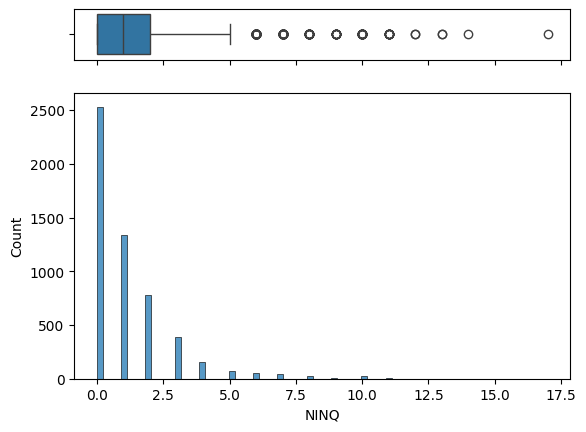

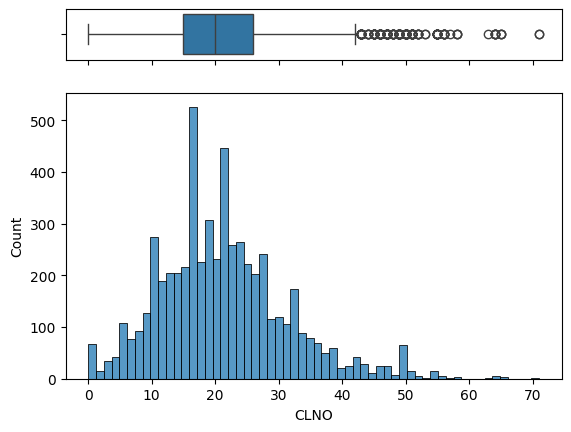

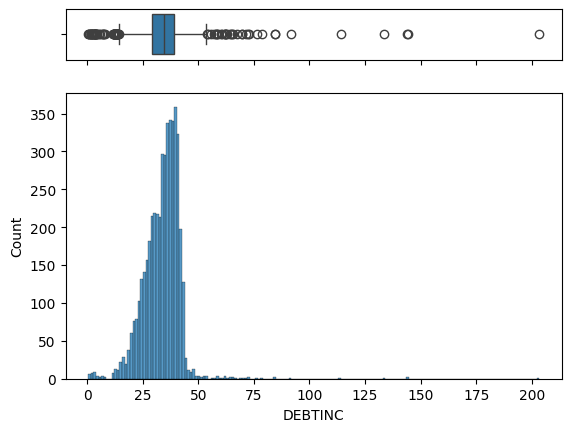

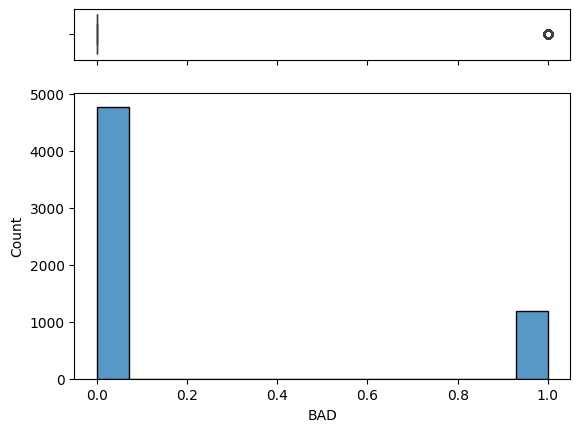

In [ ]:
for col in NumericColumns:

  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  sns.boxplot(data[col], orient="h", ax=ax_box)
  sns.histplot(data[col], ax=ax_hist)

  ax_box.set(xlabel = col)
  plt.show()

In [ ]:
ProportionOfDependent = data['BAD'].value_counts(normalize = True, dropna=True)
print(ProportionOfDependent)

BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64


Obeservations:
- All numerical data right skews.  So outlier values happen at the upper end of the range.
- Derogetory Marks and Number of Delinquent credit lines both have a mode of 1.
- There is approximately and 80/20 split between repayed and defaulted in the dataset.


### **Bivariate Analysis**

In [ ]:
for col in CatagoryColumns:
        crosstab = pd.crosstab(data[col], data['BAD'])
        CatagoryCount = data[col].value_counts(normalize = True, dropna=True)

        print(f"Crosstab for {col}: \n{crosstab}")
        print('-' * 40)

        print(CatagoryCount)
        print('*' * 40)

Crosstab for REASON: 
BAD         0    1
REASON            
DebtCon  3183  745
HomeImp  1384  396
----------------------------------------
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
Crosstab for JOB: 
BAD         0    1
JOB               
Mgr       588  179
Office    823  125
Other    1834  554
ProfExe  1064  212
Sales      71   38
Self      135   58
----------------------------------------
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


- Even though the reason for getting a loan is more likley to be Debt Consolidation the instances of default are more likely when applying for the reason of home improvement.

### **Multivariate Analysis**

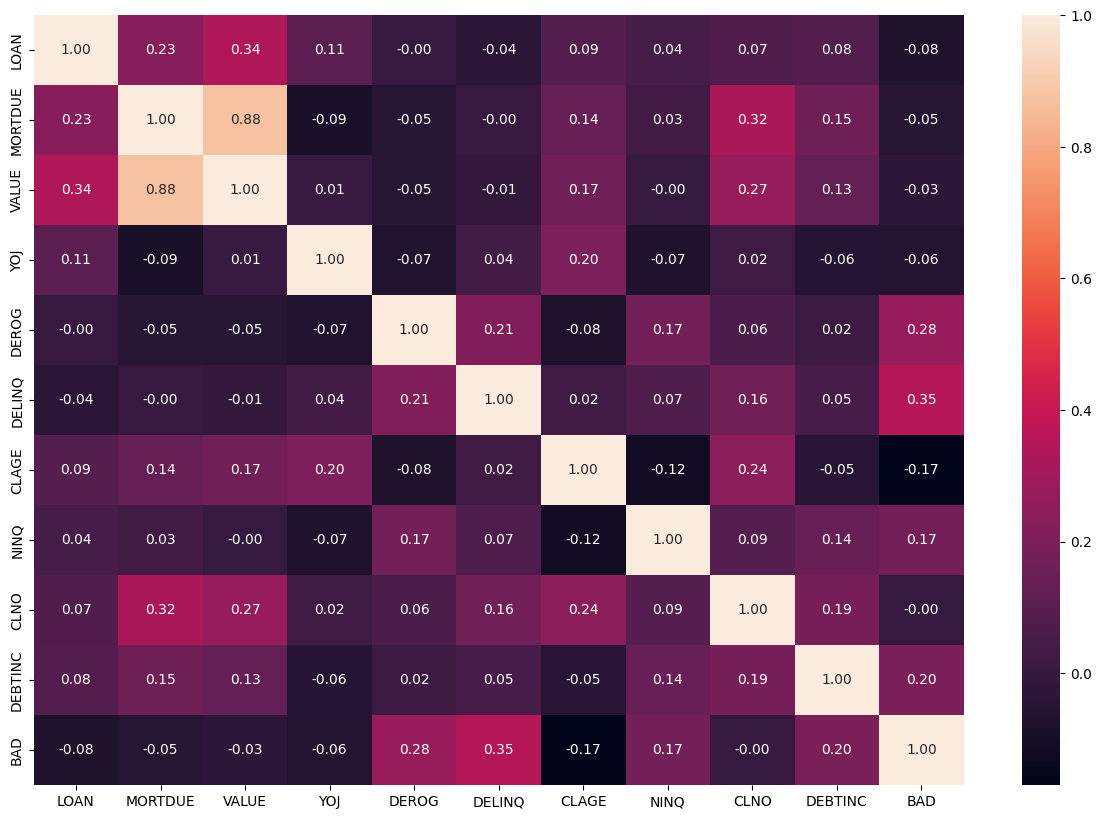

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(data[NumericColumns].corr(), annot = True, fmt = '0.2f')

plt.show()

- Correlation Matrix shows strong (>80%) correlation between the Mortgage Due and the value of the property.
- Highest correlation with the dependent variable is with Derogetory, and Delinquent marks in credit history.

In [ ]:
HighCorrelation = ['BAD','DEROG','DELINQ','DEBTINC']

In [ ]:
HighCorrelation_DF = data[HighCorrelation]

In [ ]:
HighCorrelation_DF.head()

,BAD,DEROG,DELINQ,DEBTINC
0,1,0.0,0.0,NaN
1,1,0.0,2.0,NaN
2,1,0.0,0.0,NaN
3,1,NaN,NaN,NaN
4,0,0.0,0.0,NaN


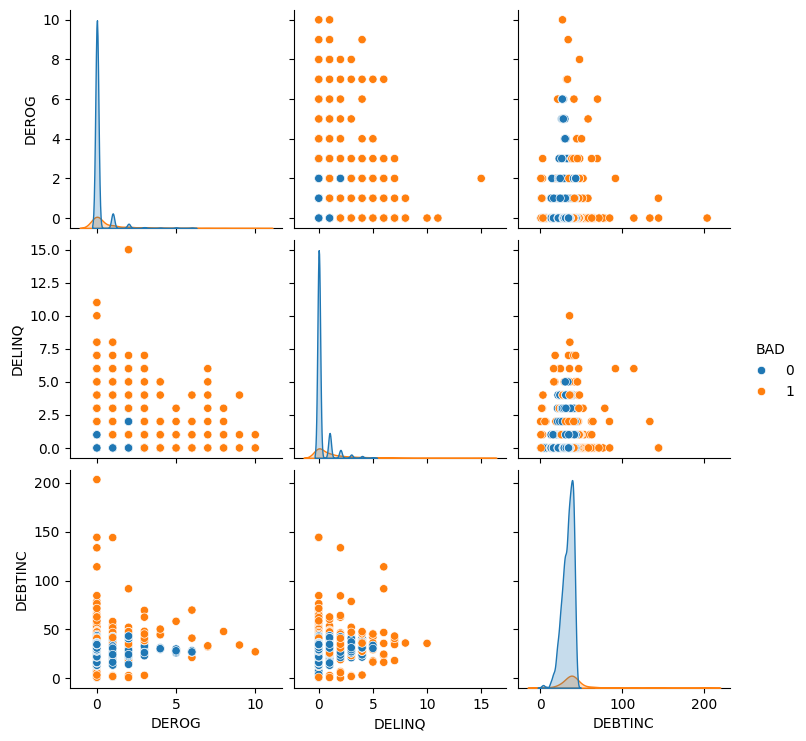

In [ ]:
sns.pairplot(HighCorrelation_DF, dropna = True, hue = 'BAD')

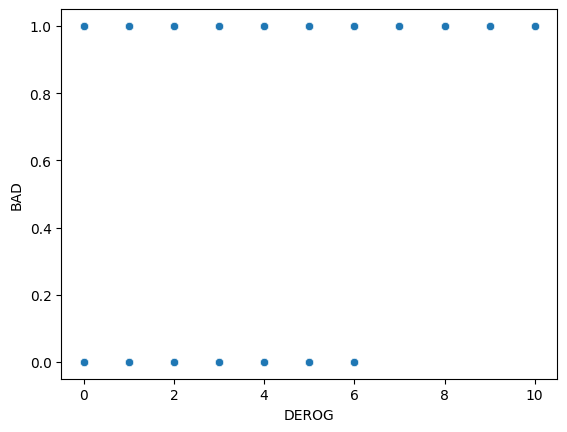

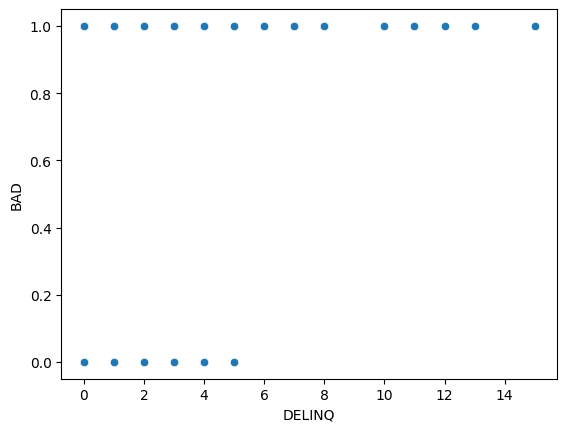

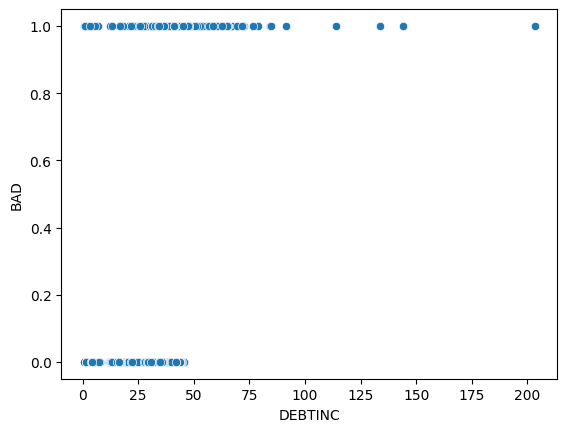

In [ ]:
for col in HighCorrelation:
  if col != 'BAD':
    sns.scatterplot(data=HighCorrelation_DF, x=col, y="BAD")
    plt.show()

There are instances of default along the full range of values for all columns, but there are clear cutoffs where only we see only defaults above a certain value.
- Debt to Income ratio > 50
- Delinquent marks > 5
- Derogetory marks > 6

In [ ]:
LoanAndPropertyAmounts = ['MORTDUE', 'LOAN', 'VALUE','BAD']

In [ ]:
LoanAndPropertyAmounts_DF = data[LoanAndPropertyAmounts]

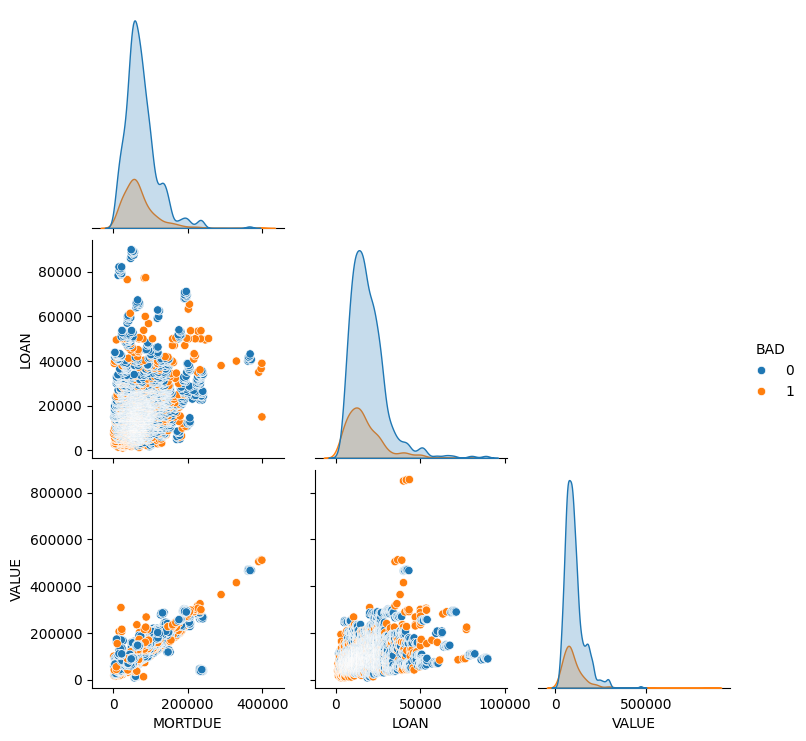

In [ ]:
sns.pairplot(LoanAndPropertyAmounts_DF, corner = True, dropna = True, hue = 'BAD')

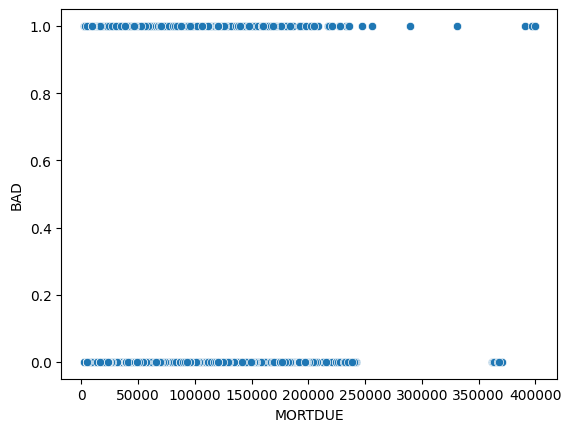

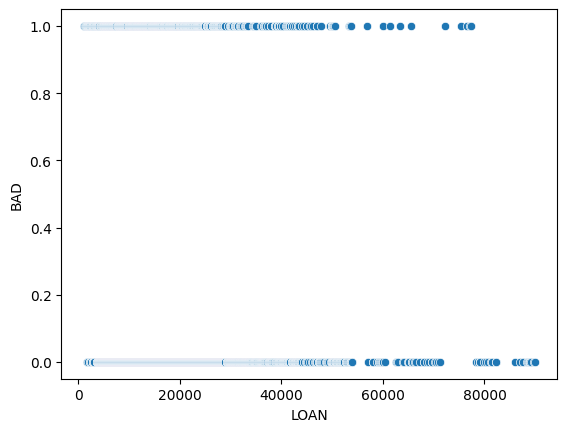

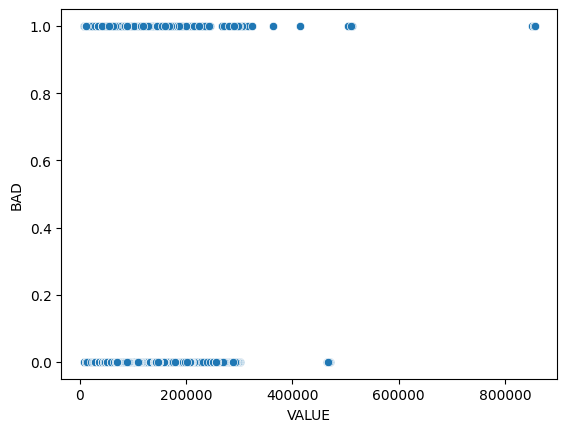

In [ ]:
for col in LoanAndPropertyAmounts:
  if col != 'BAD':
    sns.scatterplot(data=LoanAndPropertyAmounts_DF, x=col, y="BAD")
    plt.show()

In [ ]:
LoanValuesMean = data.groupby('BAD')['LOAN']
LoanValuesMean.describe()

,count,mean,std,min,25%,50%,75%,max
BAD,,,,,,,,
0,4771.0,19028.107315,11115.758554,1700.0,11700.0,16900.0,23500.0,89900.0
1,1189.0,16922.119428,11418.455152,1100.0,9200.0,14900.0,21700.0,77400.0


In [ ]:
GoodStanding = data.groupby('BAD')['VALUE']
GoodStanding.describe()

,count,mean,std,min,25%,50%,75%,max
BAD,,,,,,,,
0,4764.0,102595.921018,52748.392952,8000.0,67297.75,90659.0,120615.5,471827.0
1,1084.0,98172.846227,74339.822506,8800.0,59368.25,82000.0,116000.0,855909.0


In [ ]:
#adding in the equity of the property to see if there is any relationship
data['EQUITY'] = data['VALUE'] - data['MORTDUE']

Customers that have more home equity may be safer to loan to becuase they would have greater collateral.

In [ ]:
NumericColumns = ['BAD','LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC','EQUITY']

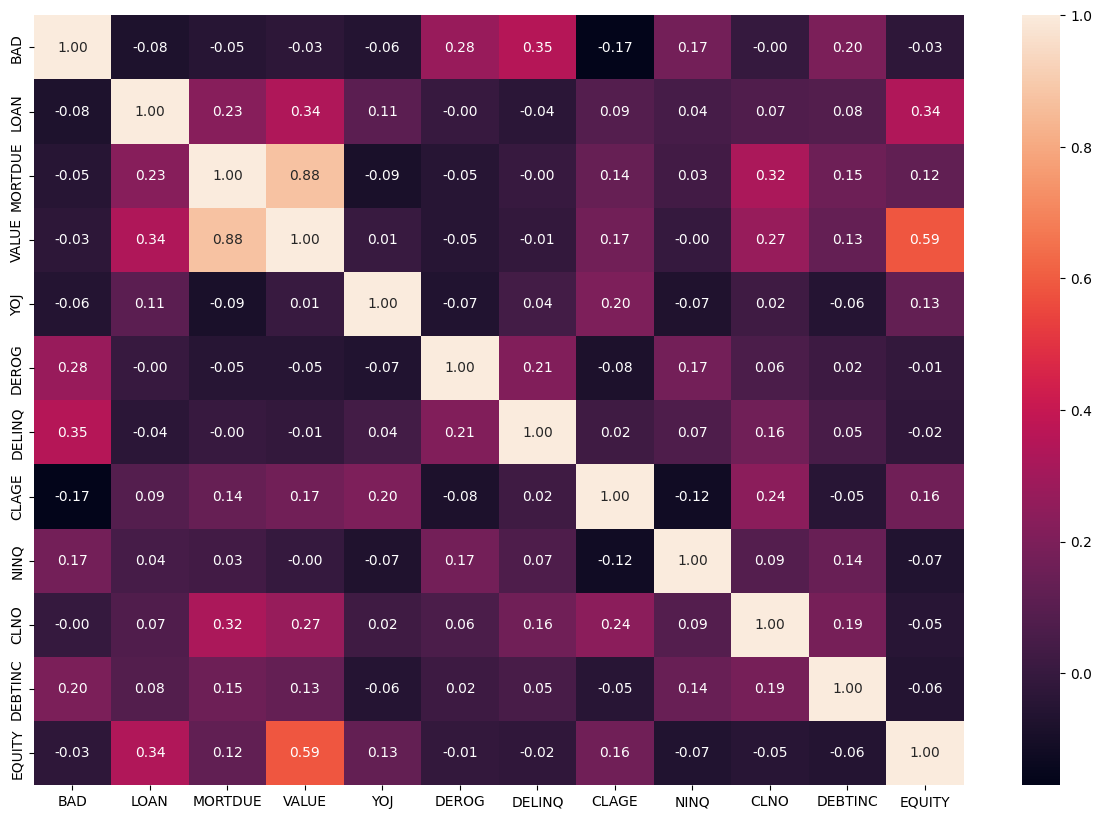

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data[NumericColumns].corr(), annot = True, fmt = '0.2f')
plt.show()

While there is a moderate correlation between equity and home value.  There is a slight negative correllation with the dependent variable.

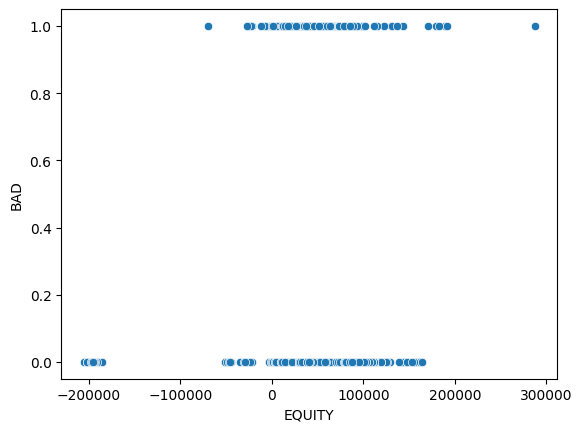

In [ ]:
sns.scatterplot(data=data, x='EQUITY', y="BAD")
plt.show()

In [ ]:
HomeEquity = data.groupby('BAD')['EQUITY']
HomeEquity.describe()

,count,mean,std,min,25%,50%,75%,max
BAD,,,,,,,,
0,4359.0,31590.275926,26744.008059,-205445.0,17668.0,27161.0,40708.5,163796.0
1,998.0,29684.262265,24469.371511,-69500.0,16056.5,23915.0,36322.5,287300.0


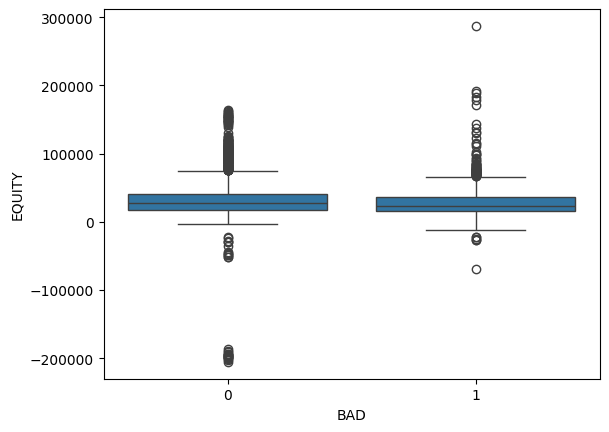

In [ ]:
sns.boxplot(data=data, x='BAD', y="EQUITY")
plt.show()

Equity has an outlier where one applicant with significant equity defaulted on the loan.  Generally it seems like those that are underwater are more likely to repay their loan.

## Treating Outliers

In [ ]:
ColumnsToTreat = ['LOAN','MORTDUE','VALUE','CLAGE','NINQ','CLNO','DEBTINC']
bounds = {}
for col in ColumnsToTreat:
    if col != 'BAD':  # Exclude the dependent variable from the calculation
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      bounds[col] = (lower_bound, upper_bound)

TreatedData = data.copy()
for col in bounds.keys():
  lower_bound, upper_bound = bounds[col]
  TreatedData = TreatedData[(TreatedData[col] >= lower_bound) & (TreatedData[col] <= upper_bound)]

In [ ]:
TreatedData.shape

(3286, 14)

Even though this removed a significant amount of the data the remaining training data is still larger enough to be used for training and test.

## Treating Missing Values

In [ ]:
TreatedData.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON      75
JOB         68
YOJ        158
DEROG      181
DELINQ      81
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
EQUITY       0
dtype: int64

This removed all null values for all but the Job and Reason Catagories.
For both I am going to assign the values for NaN values to be the mode of the remaining data.

In [ ]:
TreatedData['REASON'] = TreatedData['REASON'].fillna(TreatedData['REASON'].mode().iloc[0])
TreatedData['JOB'] = TreatedData['JOB'].fillna(TreatedData['JOB'].mode().iloc[0])
TreatedData['YOJ'] = TreatedData['YOJ'].fillna(TreatedData['YOJ'].mean())
TreatedData['DEROG'] = TreatedData['DEROG'].fillna(TreatedData['DEROG'].mean())
TreatedData['DELINQ'] = TreatedData['DELINQ'].fillna(TreatedData['DELINQ'].mean())

In [ ]:
TreatedData.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
EQUITY     0
dtype: int64

In [ ]:
TreatedData.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,3286.0,0.069690,0.254662,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,3286.0,17219.811321,7372.013396,1700.000000,11700.000000,16200.000000,22000.000000,41500.000000
MORTDUE,3286.0,68493.341144,31266.966726,4641.000000,48130.500000,64949.000000,87344.250000,158506.000000
VALUE,3286.0,97668.753804,37109.668045,12414.000000,70122.000000,91647.000000,116825.000000,200339.000000
YOJ,3286.0,9.141624,7.459975,0.000000,3.000000,8.000000,13.000000,41.000000
DEROG,3286.0,0.135588,0.504445,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,3286.0,0.306396,0.832944,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,3286.0,177.286195,72.802381,8.055265,118.007890,174.557509,227.972933,404.904393
NINQ,3286.0,0.877663,1.133793,0.000000,0.000000,0.000000,1.000000,5.000000
CLNO,3286.0,20.850274,7.873318,1.000000,15.000000,20.000000,26.000000,42.000000


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

*  Delinquency, Derogetory Marks, and Debt to income ratio showed the strongest correlation to default before treating for outliers and imputing missing data.
*   The average values of the loan is about 18,000 while the average value of the property being used for collateral is over 100,000.

In [ ]:
ProportionOfDependent = TreatedData['BAD'].value_counts(normalize = True, dropna=True)
print(ProportionOfDependent)

BAD
0    0.93031
1    0.06969
Name: proportion, dtype: float64


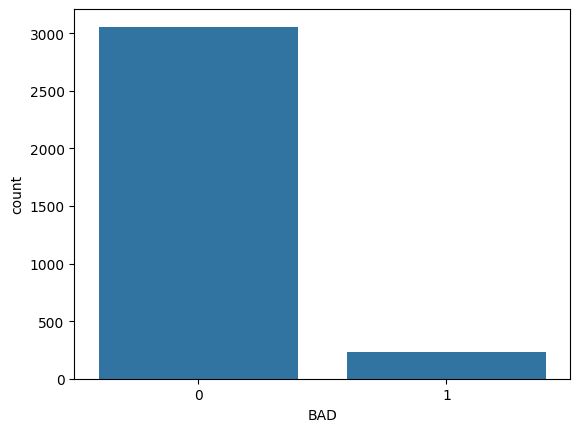

In [ ]:
sns.countplot(data=TreatedData, x='BAD')
plt.show()

Treating outliers and handleing null values has significantly shifted the bias of the data.

## **Model Building - Approach**

- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

## Creating Dummies for Catagory Columns

In [ ]:
Dummied_Data = pd.get_dummies(TreatedData, columns = CatagoryColumns, prefix=CatagoryColumns)

# Display the DataFrame with dummy variables
print("\nDataFrame with Dummy Variables:")
print(Dummied_Data)


DataFrame with Dummy Variables:
      BAD   LOAN   MORTDUE     VALUE        YOJ     DEROG  DELINQ       CLAGE  \
5       1   1700   30548.0   40320.0   9.000000  0.000000     0.0  101.466002   
7       1   1800   28502.0   43034.0  11.000000  0.000000     0.0   88.766030   
19      0   2300  102370.0  120953.0   2.000000  0.000000     0.0   90.992533   
25      1   2400   34863.0   47471.0  12.000000  0.000000     0.0   70.491080   
26      0   2400   98449.0  117195.0   4.000000  0.000000     0.0   93.811775   
...   ...    ...       ...       ...        ...       ...     ...         ...   
5689    0  40900   64674.0  111877.0  15.000000  0.000000     0.0  201.736373   
5690    0  41100  129281.0  194500.0   9.141624  1.000000     0.0  197.432069   
5692    0  41100   59463.0  112626.0  16.000000  0.000000     0.0  210.203969   
5694    0  41200   99653.0  157923.0  14.000000  0.135588     1.0  213.482874   
5699    0  41500   97536.0  158739.0  13.000000  0.135588     1.0  212.77443

## Scaling Data


In [ ]:
Scaler = StandardScaler()
ScaledData = pd.DataFrame(Scaler.fit_transform(Dummied_Data), columns = Dummied_Data.columns)

In [ ]:
ScaledData.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,EQUITY,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,3.653676,-2.105554,-1.213777,-1.545621,-0.018987,-0.268827,-0.367903,-1.041611,0.107917,-1.632378,0.480393,-1.005657,-1.68354,1.68354,-0.404472,-0.478884,1.206609,-0.551333,-0.130471,-0.126804
1,3.653676,-2.091987,-1.279223,-1.472475,0.249151,-0.268827,-0.367903,-1.216082,-0.774212,-1.632378,0.444411,-0.758952,-1.68354,1.68354,-0.404472,-0.478884,1.206609,-0.551333,-0.130471,-0.126804
2,-0.273697,-2.024153,1.083630,0.627540,-0.957471,-0.268827,-0.367903,-1.185494,-0.774212,-0.997225,-0.388799,-0.548993,-1.68354,1.68354,-0.404472,2.088186,-0.828769,-0.551333,-0.130471,-0.126804
3,3.653676,-2.010586,-1.075751,-1.352893,0.383220,-0.268827,-0.367903,-1.467141,0.107917,0.019020,0.661305,-0.858670,-1.68354,1.68354,2.472358,-0.478884,-0.828769,-0.551333,-0.130471,-0.126804
4,-0.273697,-2.010586,0.958207,0.526257,-0.689333,-0.268827,-0.367903,-1.146764,-0.774212,-0.997225,-0.688751,-0.540545,-1.68354,1.68354,-0.404472,2.088186,-0.828769,-0.551333,-0.130471,-0.126804


In [ ]:
X = ScaledData.drop('BAD', axis = 1)
Y = Dummied_Data['BAD']

## Train and Test Split


In [ ]:
# Splitting the dataset into the Training and Testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=28, stratify=Y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', x_train.shape);
print('X Test Shape:', x_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

X Train Shape: (2300, 19)
X Test Shape: (986, 19)
Y Train Shape: (2300,)
Y Test Shape: (986,)


In [ ]:
def ConfustionMatrixMetric(actual, predicted):
  print(classification_report(actual, predicted));
  cm = confusion_matrix(actual, predicted);
  plt.figure(figsize = (8,5));
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Repay','Default' ], yticklabels = ['Repay','Default'])
  plt.ylabel('Actual'); plt.xlabel('Predicted');
  plt.show()

## Using KNN to test Metrics

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2140
           1       1.00      0.14      0.24       160

    accuracy                           0.94      2300
   macro avg       0.97      0.57      0.61      2300
weighted avg       0.94      0.94      0.92      2300



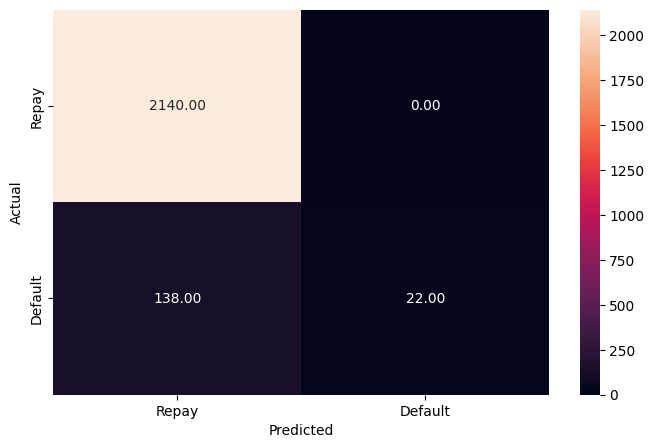

In [ ]:
knn_model= KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_train_predictions = knn_model.predict(x_train)
ConfustionMatrixMetric(y_train, knn_train_predictions)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       917
           1       1.00      0.17      0.30        69

    accuracy                           0.94       986
   macro avg       0.97      0.59      0.63       986
weighted avg       0.95      0.94      0.92       986



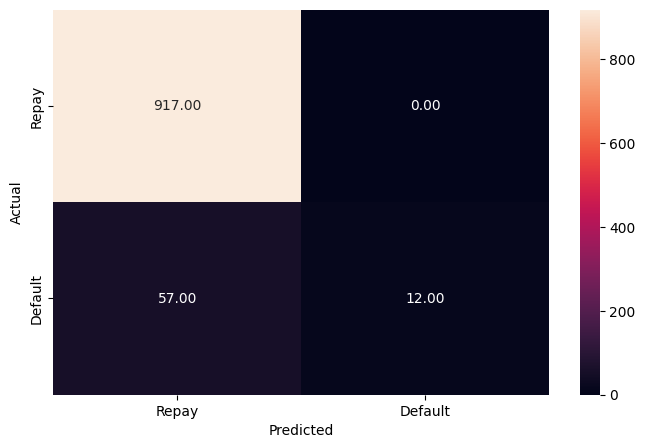

In [ ]:
knn_train_predictions = knn_model.predict(x_test)
ConfustionMatrixMetric(y_test, knn_train_predictions)

We will use precision as the metric to optimize the model for.

## Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.75      0.84      2140
           1       0.17      0.67      0.27       160

    accuracy                           0.74      2300
   macro avg       0.57      0.71      0.56      2300
weighted avg       0.91      0.74      0.80      2300



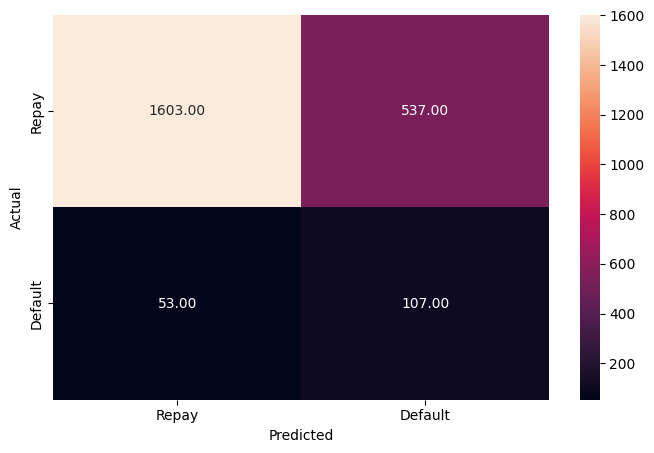

In [ ]:
RegressionModel = LogisticRegression(class_weight={0:0.07, 1:0.93}, random_state=28)
RegressionModel.fit(x_train, y_train)
y_pred = RegressionModel.predict(x_train)
ConfustionMatrixMetric(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       917
           1       0.20      0.72      0.31        69

    accuracy                           0.77       986
   macro avg       0.59      0.75      0.59       986
weighted avg       0.92      0.77      0.83       986



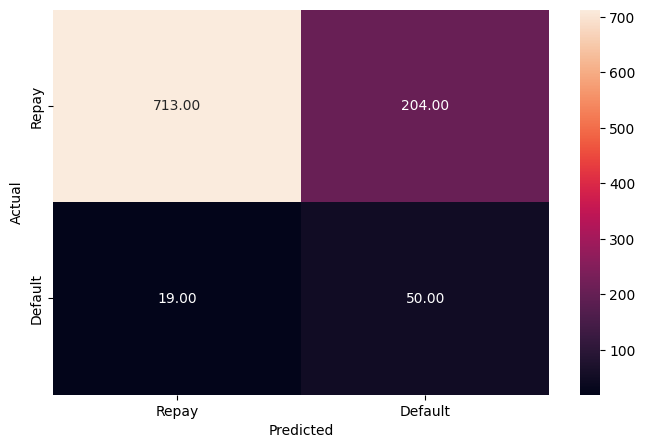

In [ ]:
y_pred = RegressionModel.predict(x_test)
ConfustionMatrixMetric(y_test, y_pred)

## Decision Tree

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2140
           1       0.34      0.88      0.49       160

    accuracy                           0.87      2300
   macro avg       0.66      0.88      0.71      2300
weighted avg       0.94      0.87      0.90      2300



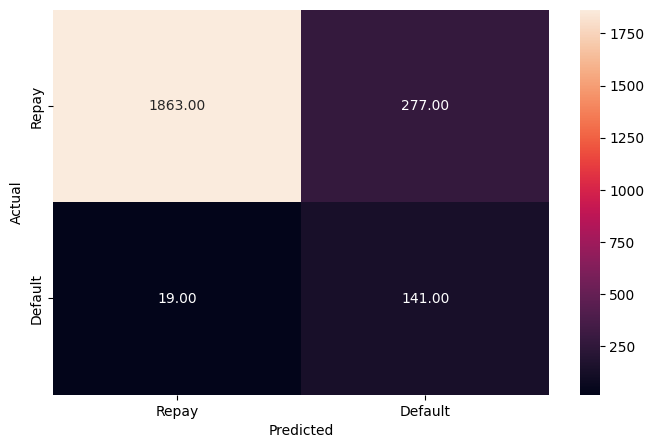

In [ ]:
tree_model = DecisionTreeClassifier(class_weight={0:0.07, 1:0.93}, random_state=28, criterion='gini', splitter='random',max_depth=9)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_train)
ConfustionMatrixMetric(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       917
           1       0.26      0.59      0.36        69

    accuracy                           0.85       986
   macro avg       0.61      0.73      0.64       986
weighted avg       0.92      0.85      0.88       986



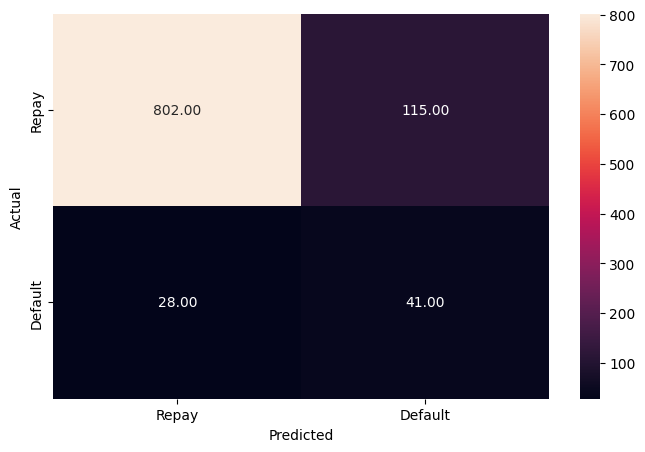

In [ ]:
y_pred = tree_model.predict(x_test)
ConfustionMatrixMetric(y_test, y_pred)

<Axes: xlabel='Importance', ylabel='None'>

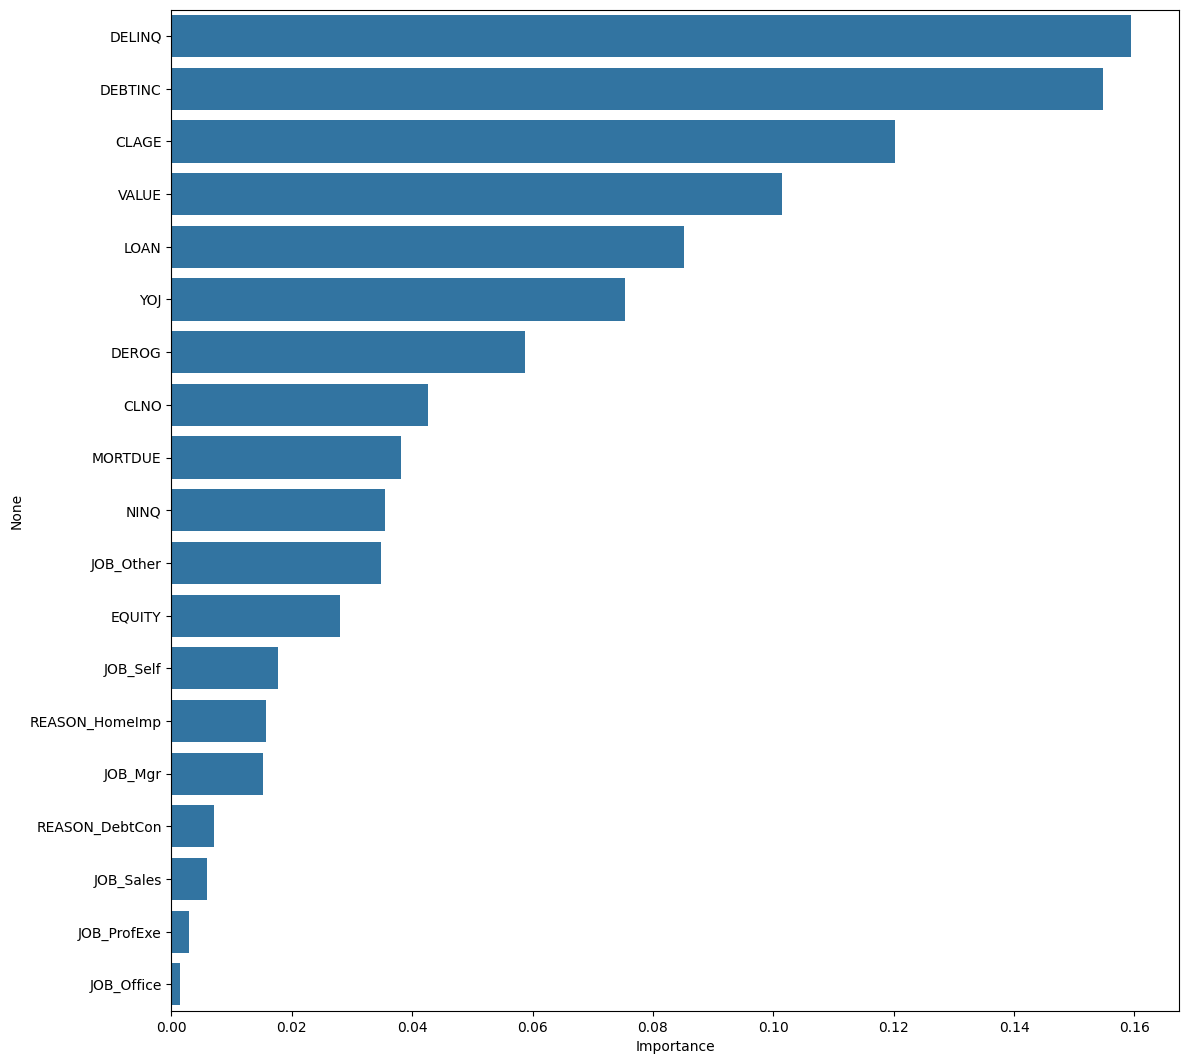

In [ ]:
importances = tree_model.feature_importances_
columns = X.columns
importance_data = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_data.Importance,y=importance_data.index)

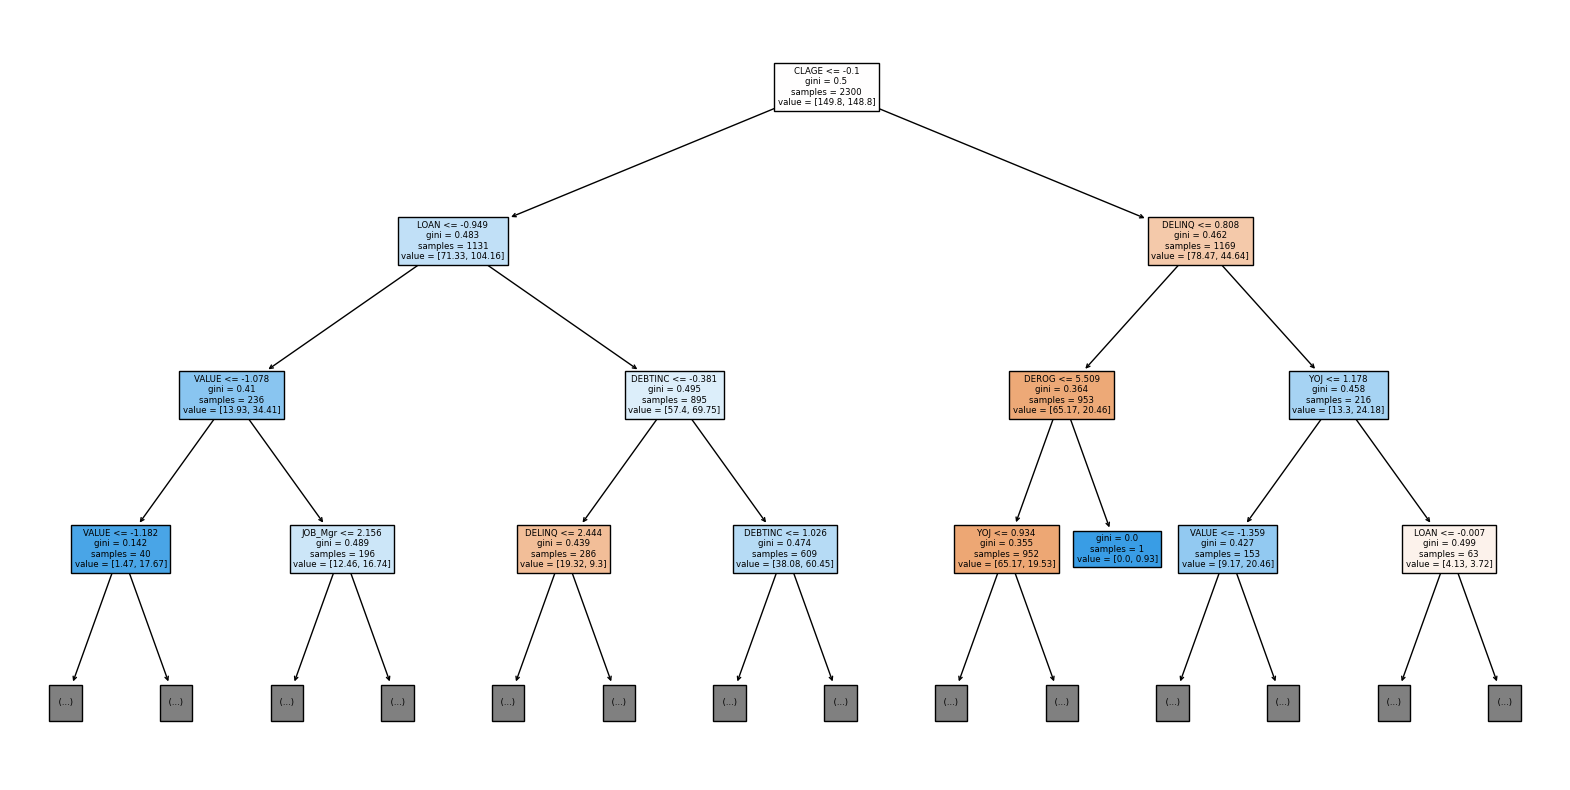

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns,max_depth=3)
plt.show()

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


## Building a Random Forest Classifier

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2140
           1       0.33      0.79      0.47       160

    accuracy                           0.87      2300
   macro avg       0.66      0.83      0.70      2300
weighted avg       0.94      0.87      0.90      2300



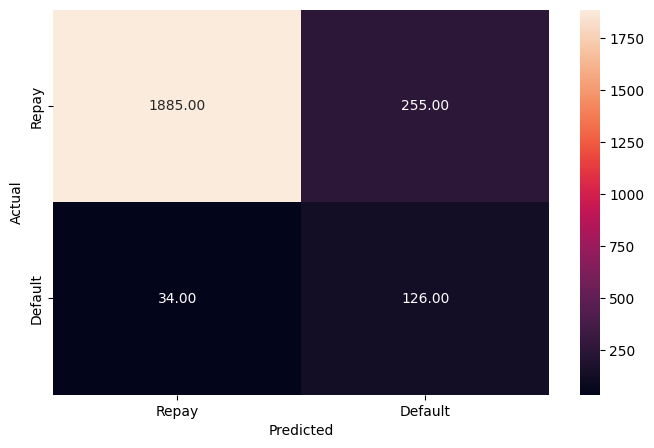

In [ ]:
forest_model = RandomForestClassifier(class_weight={0:0.07, 1:0.93}, random_state=28, criterion='gini',max_depth=4)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_train)
ConfustionMatrixMetric(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       917
           1       0.30      0.61      0.40        69

    accuracy                           0.87       986
   macro avg       0.63      0.75      0.66       986
weighted avg       0.92      0.87      0.89       986



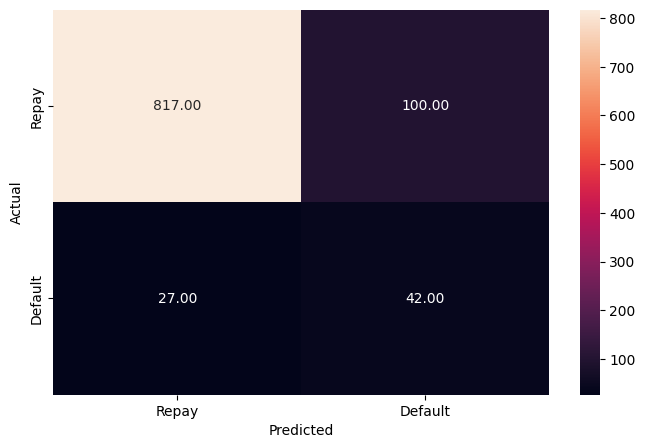

In [ ]:
y_pred = forest_model.predict(x_test)
ConfustionMatrixMetric(y_test, y_pred)

## Random Forest Classifier Hyperparameter Tuning

In [ ]:
# Choose the type of classifier
TunedForest = RandomForestClassifier(class_weight={0:0.07, 1:0.93}, random_state=28)

# Grid of parameters to choose from
params_rf = {
        "criterion": ['gini','entropy'],
        "max_depth": [4, 6, 8, 10],
        "min_samples_leaf": [2, 4, 6, 8],
        "min_samples_split": [2, 4, 6, 8]
}


# Type of scoring used to compare parameter combinations - precision score for class 1
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(TunedForest, params_rf, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
best_params = grid_obj.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2140
           1       0.99      0.94      0.96       160

    accuracy                           1.00      2300
   macro avg       0.99      0.97      0.98      2300
weighted avg       1.00      1.00      1.00      2300



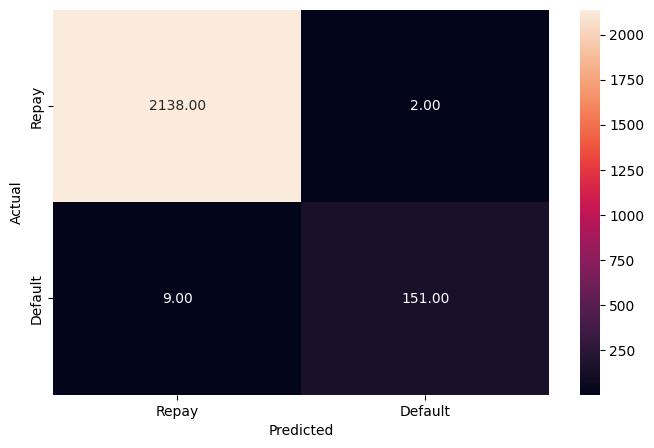

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)
y_pred = rf_estimator_tuned.predict(x_train)
ConfustionMatrixMetric(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       917
           1       0.86      0.28      0.42        69

    accuracy                           0.95       986
   macro avg       0.91      0.64      0.69       986
weighted avg       0.94      0.95      0.93       986



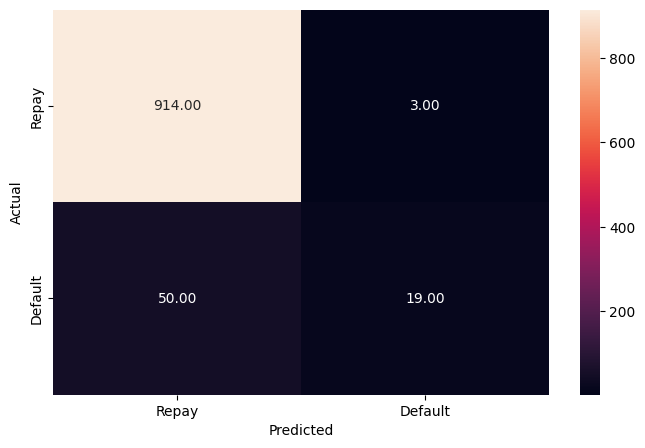

In [ ]:
y_pred = rf_estimator_tuned.predict(x_test)
ConfustionMatrixMetric(y_test, y_pred)

<Axes: xlabel='Importance', ylabel='None'>

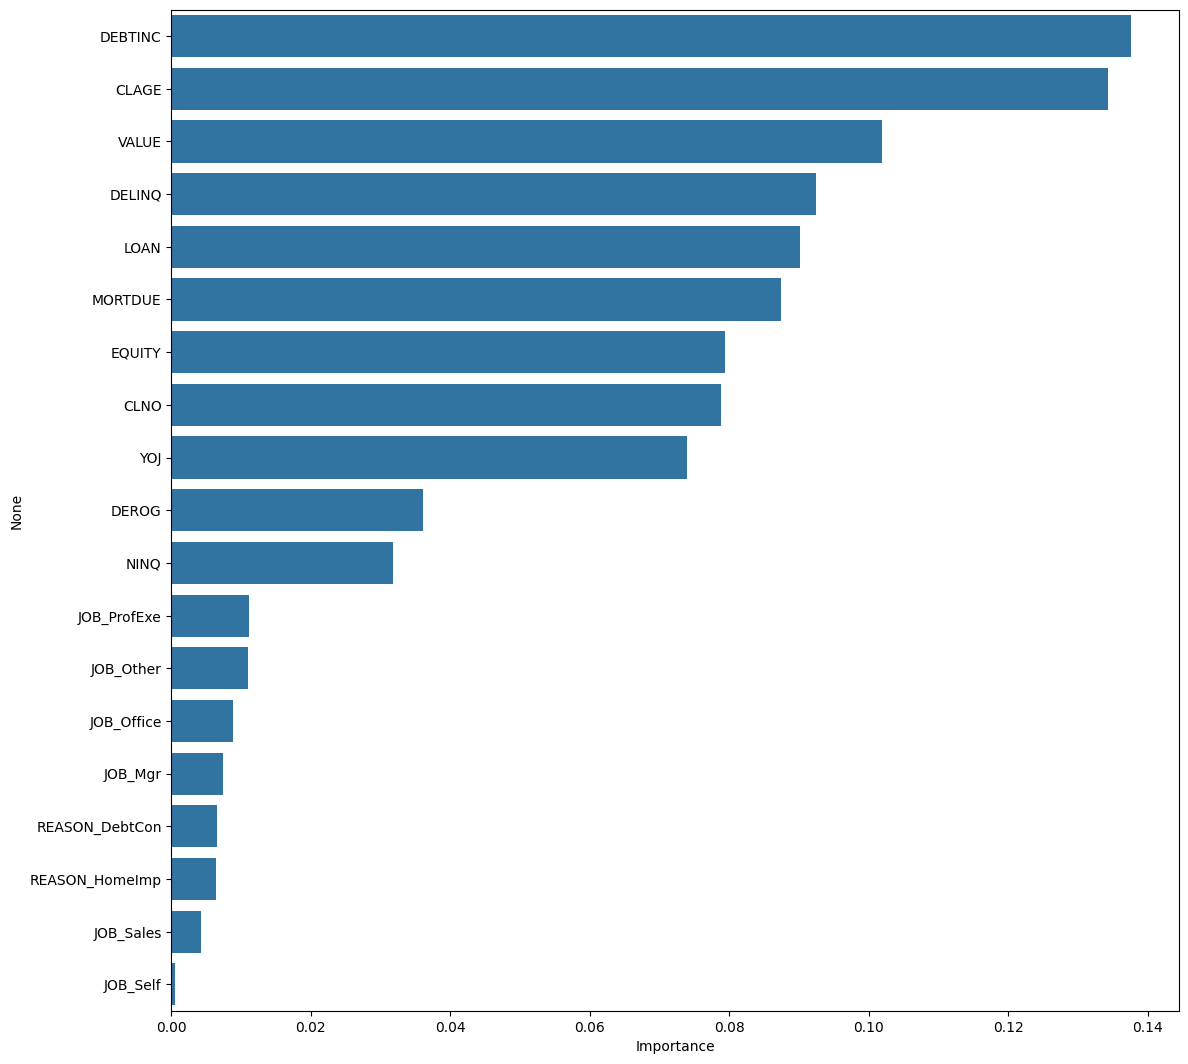

In [ ]:
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_data = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_data.Importance,y=importance_data.index)

## Findings and Recommendations

Loans are Home Equity Loans applicants use the home as collateral.
The applicant has a property with a mortgage.
With an 80 / 20 bias towards repayment.
The dataset has 5,960 entries with 11 features.
The data has a significant number of null values.
	- Debt to Income Ratio has 1267 which is a little over 20%.
The average value of the loan 18,607 and range from 1,000 to 90,000.
The average value of the property (collateral) is 101,776.
The average current mortgage still due is 73,760.
Applicants are primarily used the loan for Debt Consolidation or Home Improvement.
Loans for Home Improvement are more likely to default.
The data has significant outliers in almost all columns.
There is a strong correlation between the Mortgage Due and the Value of the property.
Derogatory Marks or Delinquent Marks on their credit report are the most highly correlated with Default.

Strictly based on the three highest correlated parameters suggest that
- Debt to Income ratio > 50
- Delinquent marks > 5
- Derogatory marks > 6

I calculated the value Equity by subtracting the value of the property from the mortgage due to see if there was a stronger correlation with the dependent variable.
When treating for outlier I chose to exclude Derogatory and Delinquent marks.  These showed strong correlation before data cleaning and I knew that some of the outliers would be removed during the process.
After Treating the data there is a stronger bias towards loan repayment 95/5.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- The Random Forest after hyperparameter tuning was the best model.  There is room for scope improvement with regard to cleaning and imputing the data as well as further hyperparameter tuning that could benefit the model.
- I chose Percision as the metric given that we would want to evaluate the positives.  Minimizing false positives.  Applicants that are predicted to default could be future analyzed by an auditor.
- The random forest model removes the ability to easily interpret the algorithm.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?
- High Delinquency and Derogetory marks are a strong indicator of future default.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
- I would recommend the tuned random forest model due as a first pass method of evaluating applicants.  Applicants whose loans are originally predicited to fail could be further evaluated by a trained auditor to try to capture good payers who may otherwise be turned down.
- I belive that the model can be deployed for use to identify safe applicants, and the standard auditing process be followed for applicants that are considered risky.

#Summary

Due to the high cost of approving an applicant loan that goes into default the goal is to use a data science model to better predict applicant's risk. I found that a tuned random forest model can predict those that will repay a loan with high confidence. Key factors that are being assessed in the model are the age of an applicant's credit history and their debt to income ratio. I would recommend that this model be utilized to idenfy safe applicants and continue the typical audit process with applicants the model predicts will be risky.

#Recommendations for implementation
Several applicants were approved but their data was not recorded.  This is the highest risk of approval and should be corrected first.

Use of this model to focus auditors on applicants that would be deemed risky will lower workload and allow for increased scrutiny.

As additional data is collected the model can be refined with a focus on have a model that can accurately identify clients that will default.


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/AppliedDataScience/Projects/Capstone/Capstone_Proj.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AppliedDataScience/Projects/Capstone/Capstone_Proj.ipynb to html
[NbConvertApp] Writing 2287104 bytes to /content/drive/MyDrive/AppliedDataScience/Projects/Capstone/Capstone_Proj.html
